In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [210]:
data=pd.read_csv("data.csv")
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)
#data

In [211]:
my_data=data.loc[:,'radius_mean':'fractal_dimension_worst']
Y_data=data.loc[:,'diagnosis']


In [212]:
label=[]
Y=np.array([])
for i in range(len(Y_data)):
    if Y_data.loc[i]=="M":
        Y=np.append(Y,1)
    else:
        Y=np.append(Y,0)



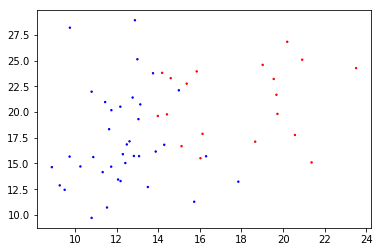

In [213]:
X_train, X_test, y_train, y_test = train_test_split( my_data, Y, test_size=.9, random_state=42)
label=[]

for i in range(len(y_train)):
    if y_train[i]==1:
        label.append("red")
        
    else:
        label.append("blue")
        
plt.scatter(X_train['radius_mean'],X_train['texture_mean'],c=label,s=2)
plt.show()

In [219]:
import math
def sigmoid(z):
    sig=1/(1+math.exp(-z))
    return sig

In [245]:
teta=.001*np.ones((31,))



In [246]:
x=X_train.values
print(x.shape)
x=np.concatenate((np.ones((len(x),1)),x),axis=1)



(56, 30)


In [249]:
def cost(x,y,teta):
    m=len(y)
    cost_value=0
    for i in range(m):
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        #print(h_teta)
        cost_iter=y[i]*(np.log(h_teta))+(1-y[i])*((np.log(1-h_teta)))
        cost_value=cost_value+ cost_iter
    return (-1/m)*cost_value

In [250]:
cost(x,y_train,teta)
#sigmoid(np.matmul(teta.T,x[i]))

1.0592434941560058

In [252]:
def calculate_weight1(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((31,1))
   
    for i in range(m):
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        print(h_teta)
        #sum_error1=sum_error1+((h_teta-y[i])*x[i])
    #return teta-(rate*sum_error1)


In [265]:
def calculate_weight(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((1,31))
   
    for i in range(m):
        print(np.matmul(teta.T,x[i]))
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        print(h_teta)
        sum_error1=sum_error1+((h_teta-y[i])*x[i])
    return teta-rate*sum_error1[0]

In [266]:
np.matmul(teta.T,x[i])

-1484.1835004669956

In [267]:
teta=calculate_weight(x,y_train,teta,rate=0.0001)


-3624.9849085495334


OverflowError: math range error

In [255]:
cost(x,y_train,teta)

OverflowError: math range error

In [191]:
teta

array([-4.48541972, -3.65854107, -8.69832705,  2.22294636])

In [205]:
for i in range(10000):
    teta=calculate_weight(x,y_train,teta,rate=0.00001)
    #cost(x,y[0:100],teta[0])

In [206]:
cost(x,y_train,teta)

0.5683192823440998

In [75]:
1.939/.732

    

2.648907103825137

In [76]:
def my_plot(teta):
    x=np.linspace(10,20,300)
    y=(-teta[0]/teta[2])+(-teta[1]/teta[2])*x
    plt.plot(x,y)

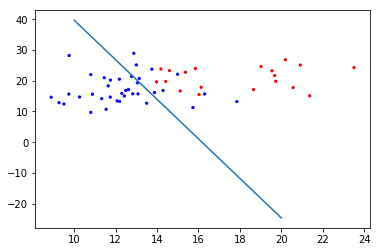

In [77]:
my_plot(teta)

plt.scatter(x[:,1],x[:,2],c=label,s=5)

In [207]:
x_t=X_test.values
x_t.shape
x_t=np.concatenate((np.ones((513,1)),x_t),axis=1)

g_X_teta=np.matmul(teta.T,x_t.T)
y_predicted=np.ones(len(x_t))
for i in range(len(g_X_teta)):
    temp=sigmoid(g_X_teta[i])
    if temp <.5:
        y_predicted[i]=0
        
    
    

In [208]:
k=np.where(y_predicted+y_test==1)
error=(len(k[0])/len(x_t))*100
print("Error in percent:", error ,"%" )



Error in percent: 26.900584795321635 %
